## Задание 1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE


In [ ]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
target = boston.target

In [ ]:
X_train, X_test, y_train, y_test  = train_test_split(df, target, test_size=0.2, random_state=42)

In [ ]:
standart = StandardScaler()

X_train_std = pd.DataFrame(standart.fit_transform(X_train), columns=boston.feature_names)
X_test_std = pd.DataFrame(standart.fit_transform(x_test), columns=boston.feature_names)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


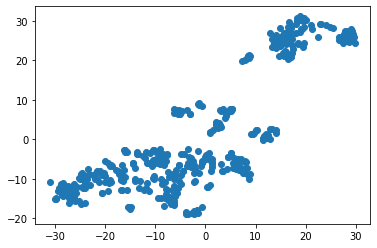

In [ ]:
tsne_boston = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne_boston.fit_transform(X_train_std)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()


## Задание 2

In [ ]:
from sklearn.cluster import KMeans
model_k_mean = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [ ]:
X_train_k_mean = model_k_mean.fit_transform(X_train_std)
train_lablels = model_k_mean.labels_


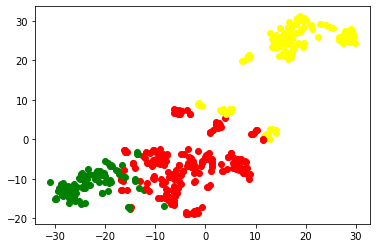

In [ ]:
for i in range(len(train_lablels)):
  if train_lablels[i] == 0:
    plt.scatter(X_train_tsne[i, 0], X_train_tsne[i, 1], color='green')
  elif train_lablels[i] == 1:
    plt.scatter(X_train_tsne[i, 0], X_train_tsne[i, 1], color='yellow')
  elif train_lablels[i] == 2:
    plt.scatter(X_train_tsne[i, 0], X_train_tsne[i, 1], color='red')
plt.show()


Вопрос:
Почему на границе зеленые и красные явно входят в зону другого кластера?ас
Это масштаб или мало итераций?

Несколько желтых далеки от основной массы своего кластера. Почему они не могут быть красными? Нужно больше кластеров?
Спасибо.

In [ ]:
df_temp = pd.DataFrame({'Crim': X_train['CRIM'], 'Price': y_train, 'Cluster': train_lablels})
df_temp.groupby('Cluster').mean()

,Crim,Price
Cluster,,
0,0.073566,27.788372
1,10.797028,16.165354
2,0.421660,24.958115


In [ ]:
df_temp.groupby('Cluster').mean()

,Crim,Price
Cluster,,
0,0.073566,27.788372
1,10.797028,16.165354
2,0.421660,24.958115


## Задание 3

In [ ]:
test_labels = model_k_mean.predict(X_test_std)
df_temp_test = pd.DataFrame({'Crim': X_test['CRIM'], 'Price': y_test, 'Cluster': test_labels})


In [ ]:
df_temp_test.groupby('Cluster').mean()

,Crim,Price
Cluster,,
0,0.079852,28.413636
1,10.165531,16.437143
2,0.284583,22.031111
